importing panda

In [105]:
import pandas as pb

data importing

In [106]:
data_path = '../data/smartwatches.csv'

In [107]:
df = pb.read_csv(data_path)

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


1. Unnamed: 0 (remove)

In [110]:
df.shape


(450, 16)

this code select randomly 80% rows in dataset for training

In [111]:
train_df = df.sample(frac=0.8, random_state=42)

In [112]:
train_df = train_df.reset_index()

this code select other datas (20%) for test.

In [113]:
test_df = df.drop(train_df.index)

In [114]:
test_df = test_df.reset_index()

In [115]:
print(train_df.shape, test_df.shape) 

(360, 17) (90, 17)


In [116]:
train_df.tail()

,index,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
355,216,216,fitbit,11699.0,14999.0,22.001467,4.3,3999.0,Versa 2,Square,Black,Silicon,Yes,3.5,Yes,1.3 inches,20 - 35 g
356,279,279,garmin,39490.0,44990.0,12.224939,4.7,109.0,"Instinct 2, Rugged Outdoor Watch with GPS, Bui...",Circle,Grey,Silicon,No,17.5,Yes,0.9 inches,NaN
357,390,390,zebronics,2199.0,4999.0,56.011202,3.9,272.0,Zeb-Fit Me,Square,Green,Thermo Plastic Polyurethene,Yes,22.0,Yes,3.3 inches,20 - 35 g
358,337,337,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8 inches,20 - 35 g
359,236,236,fitbit,20499.0,NaN,NaN,4.7,NaN,Fitbit Versa 4 Fitness Watch (Waterfall Blue /...,Curved,Blue,Rubber,Yes,22.0,Yes,0.2 inches,NaN


In [117]:
train_df.dtypes

index                    int64
Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [118]:
train_df.isna().sum()

index                    0
Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

null values

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Unnamed: 0           360 non-null    int64  
 2   Brand                360 non-null    object 
 3   Current Price        354 non-null    float64
 4   Original Price       304 non-null    float64
 5   Discount Percentage  304 non-null    float64
 6   Rating               356 non-null    float64
 7   Number OF Ratings    315 non-null    float64
 8   Model Name           330 non-null    object 
 9   Dial Shape           260 non-null    object 
 10  Strap Color          260 non-null    object 
 11  Strap Material       304 non-null    object 
 12  Touchscreen          329 non-null    object 
 13  Battery Life (Days)  330 non-null    float64
 14  Bluetooth            355 non-null    object 
 15  Display Size         333 non-null    obj

In [120]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object' ]

In [121]:
continous_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object' ]

In [122]:
numerical_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [123]:
continous_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [124]:
train_df[numerical_data].describe()

,index,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,360.000000,360.000000,354.000000,304.000000,304.000000,356.000000,315.000000,330.000000
mean,222.702778,222.702778,12514.378531,14415.835526,47.955347,4.027528,10671.815873,14.181970
std,130.632905,130.632905,16914.978666,15613.457236,24.696899,0.556828,27575.956948,7.661878
min,0.000000,0.000000,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,111.750000,111.750000,2126.000000,5999.000000,33.177427,3.900000,55.000000,8.000000
50%,222.500000,222.500000,3999.000000,7994.500000,53.068408,4.100000,830.000000,17.500000
75%,336.250000,336.250000,17367.250000,17996.000000,66.677780,4.300000,7576.500000,22.000000
max,448.000000,448.000000,98990.000000,96390.000000,91.004550,5.000000,275607.000000,22.000000


In [125]:
train_df[numerical_data].corr()

,index,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
index,1.000000,1.000000,-0.100146,-0.084262,-0.123792,-0.247504,-0.187509,0.371223
Unnamed: 0,1.000000,1.000000,-0.100146,-0.084262,-0.123792,-0.247504,-0.187509,0.371223
Current Price,-0.100146,-0.100146,1.000000,0.971497,-0.602668,0.397179,-0.195773,0.030352
Original Price,-0.084262,-0.084262,0.971497,1.000000,-0.479494,0.325818,-0.180650,-0.132527
Discount Percentage,-0.123792,-0.123792,-0.602668,-0.479494,1.000000,-0.191073,0.235221,-0.011792
Rating,-0.247504,-0.247504,0.397179,0.325818,-0.191073,1.000000,0.085250,-0.102289
Number OF Ratings,-0.187509,-0.187509,-0.195773,-0.180650,0.235221,0.085250,1.000000,0.009617
Battery Life (Days),0.371223,0.371223,0.030352,-0.132527,-0.011792,-0.102289,0.009617,1.000000


In [126]:
train_df[numerical_data].skew()

index                  0.012368
Unnamed: 0             0.012368
Current Price          2.301689
Original Price         2.734265
Discount Percentage   -0.983632
Rating                -1.589043
Number OF Ratings      5.467630
Battery Life (Days)   -0.190298
dtype: float64

Skewness ≈ 0: The data is fairly symmetric.

Skewness > 0: The data is positively skewed (right-skewed). The right tail is longer; most data points are concentrated on the left.

Skewness < 0: The data is negatively skewed (left-skewed). The left tail is longer; most data points are concentrated on the right.

In [127]:
import ydata_profiling as pp

to save data profiling as HTML code

profile = pp.ProfileReport(train_df)
profile.to_file("report.html")

to show in VS code

pp.ProfileReport(train_df)


Understand your data visualization
1.Univariate Plots
    1.Histogram
    2.Density Plots.
    3.Box and Whisker Plots.

2.Multivariatr Plots
    1.Correlation Matrix Plot.
    2.Scatter Plot Matrix.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [129]:
numerical_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [130]:
numerical_data.remove('index')
numerical_data.remove('Unnamed: 0')

In [131]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

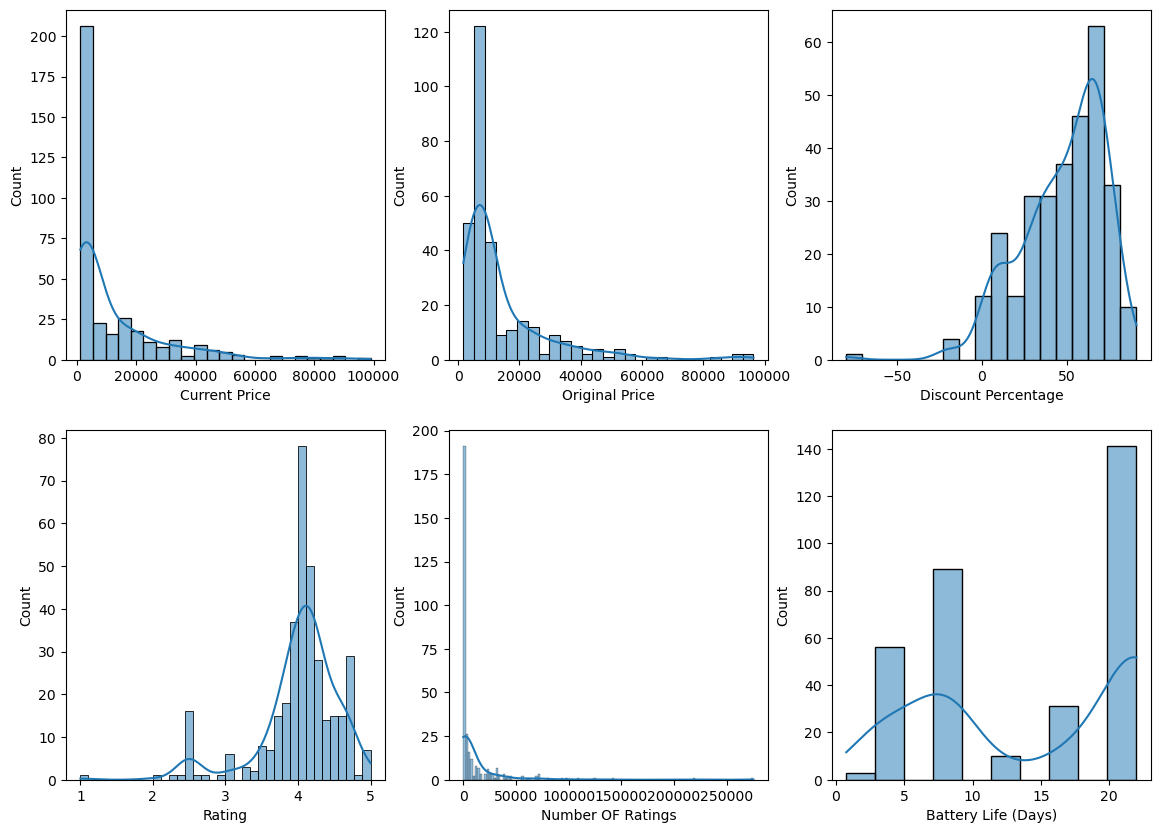

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=train_df[colum], ax=ax, kde=True)

plt.show()

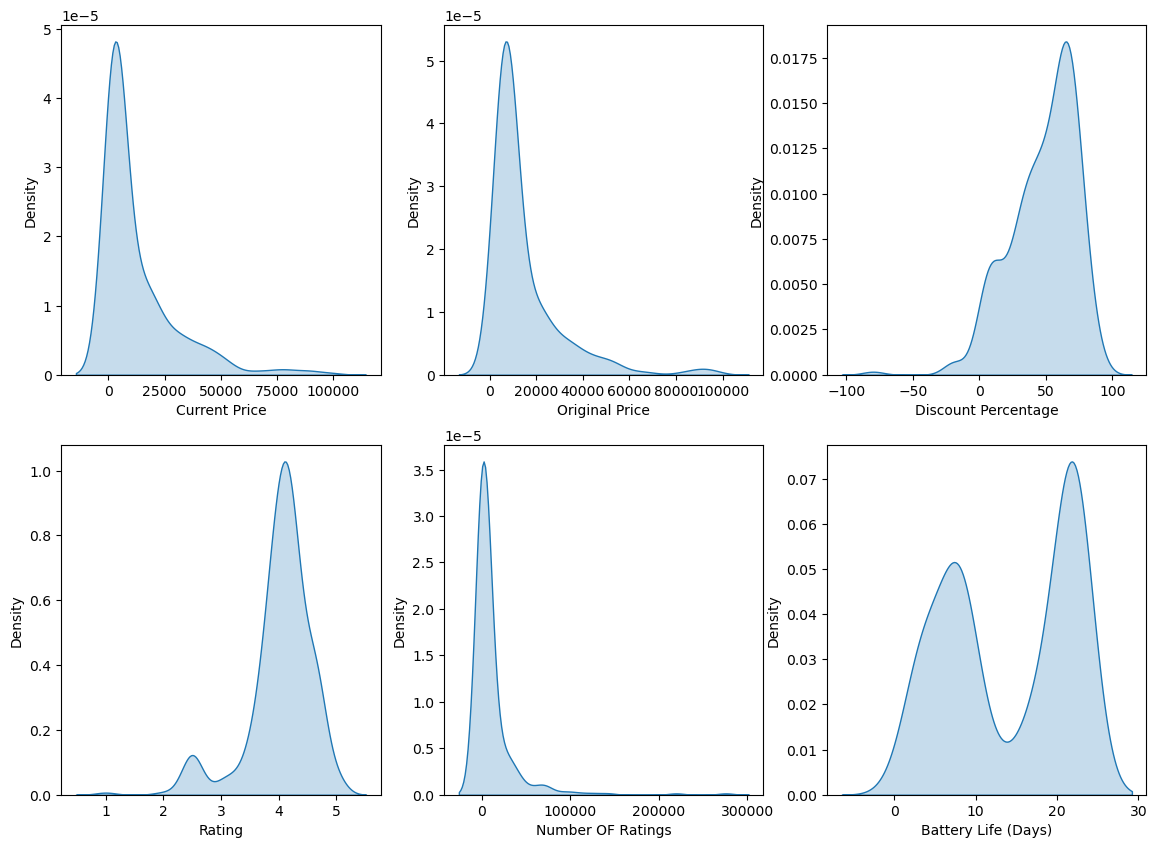

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[colum], ax=ax, fill=True)

plt.show()

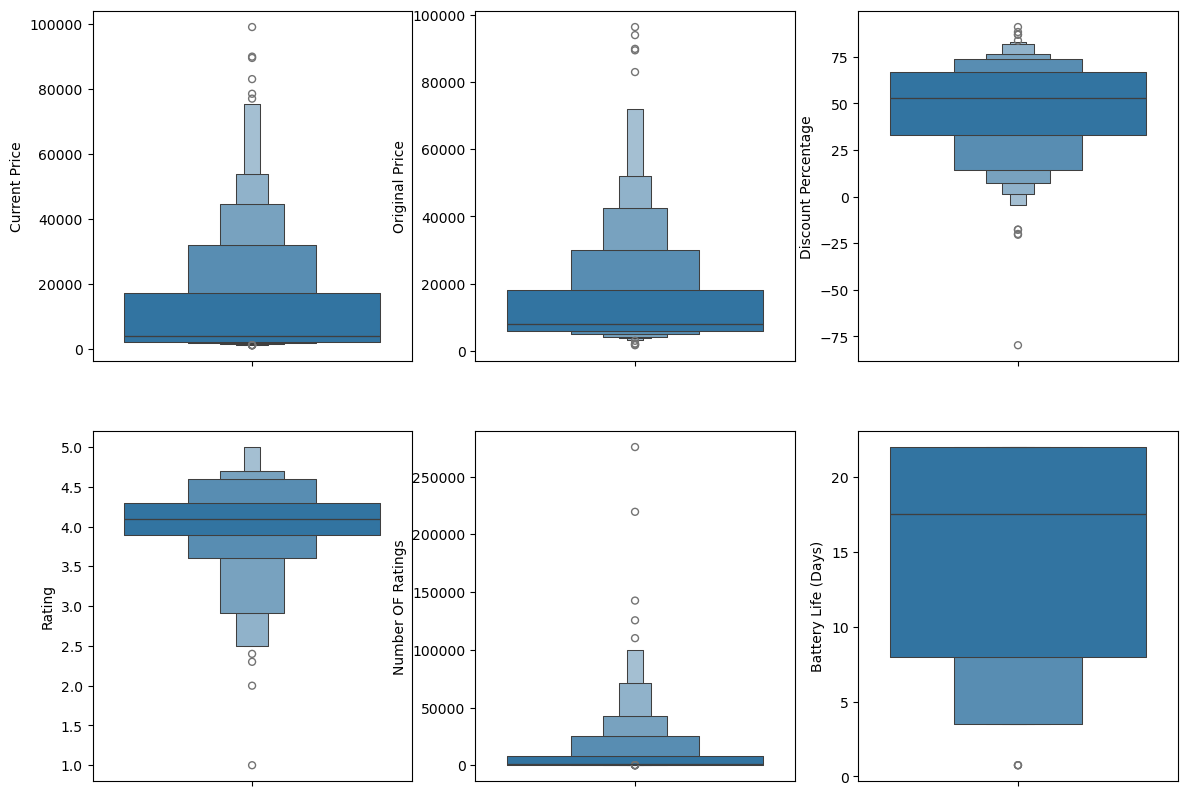

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxenplot(data=train_df[colum], ax=ax, fill=True)

plt.show()

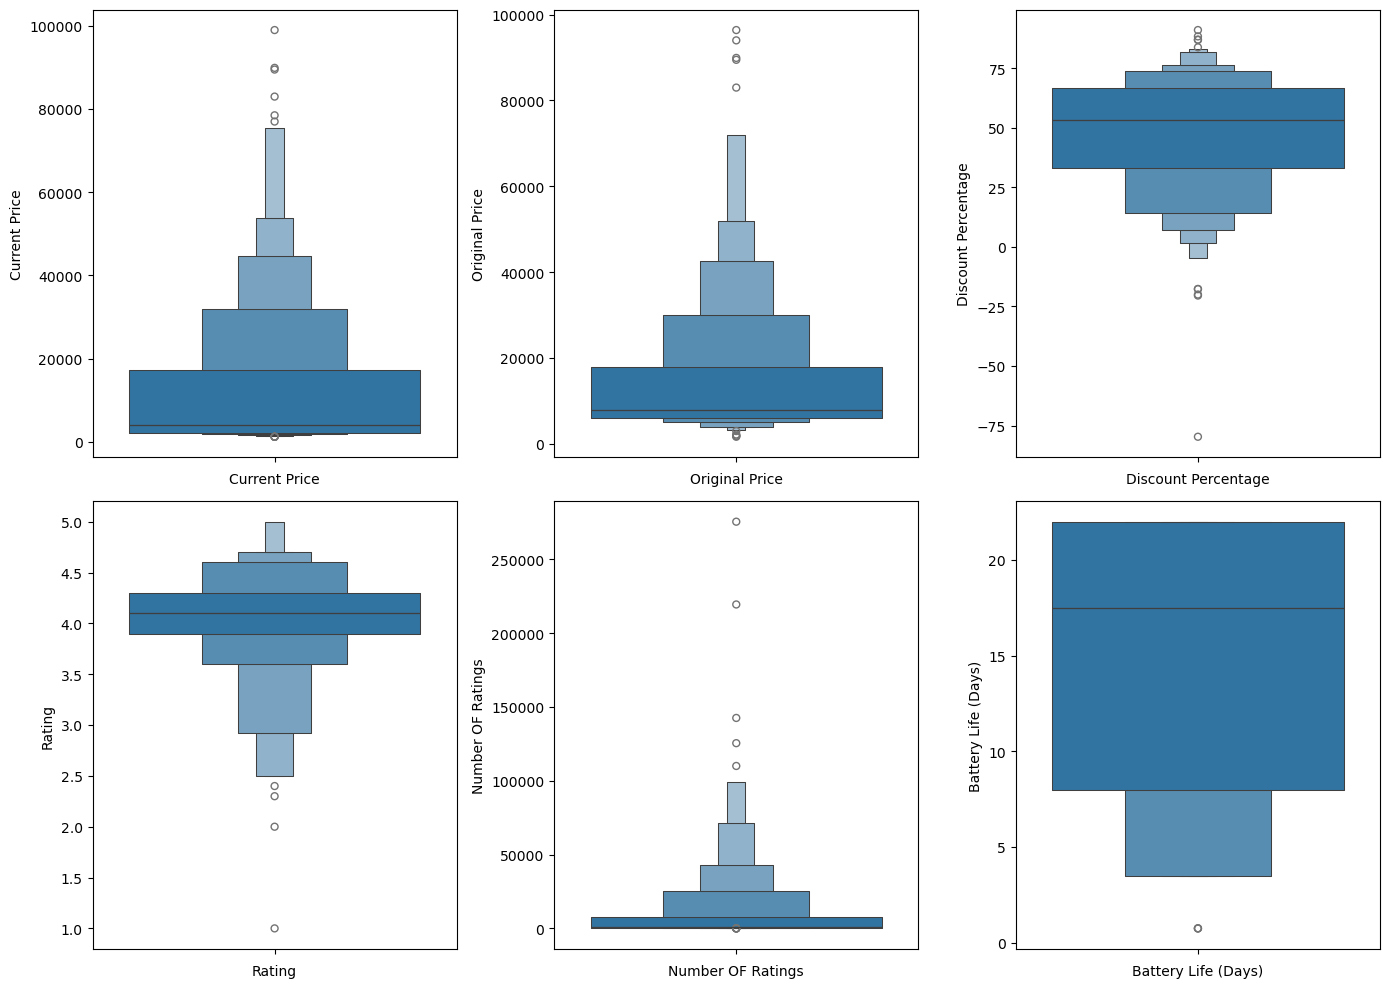

In [135]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxenplot(data=train_df[colum], ax=ax, fill=True)
    ax.set_xlabel(colum)
fig.tight_layout()
plt.show()

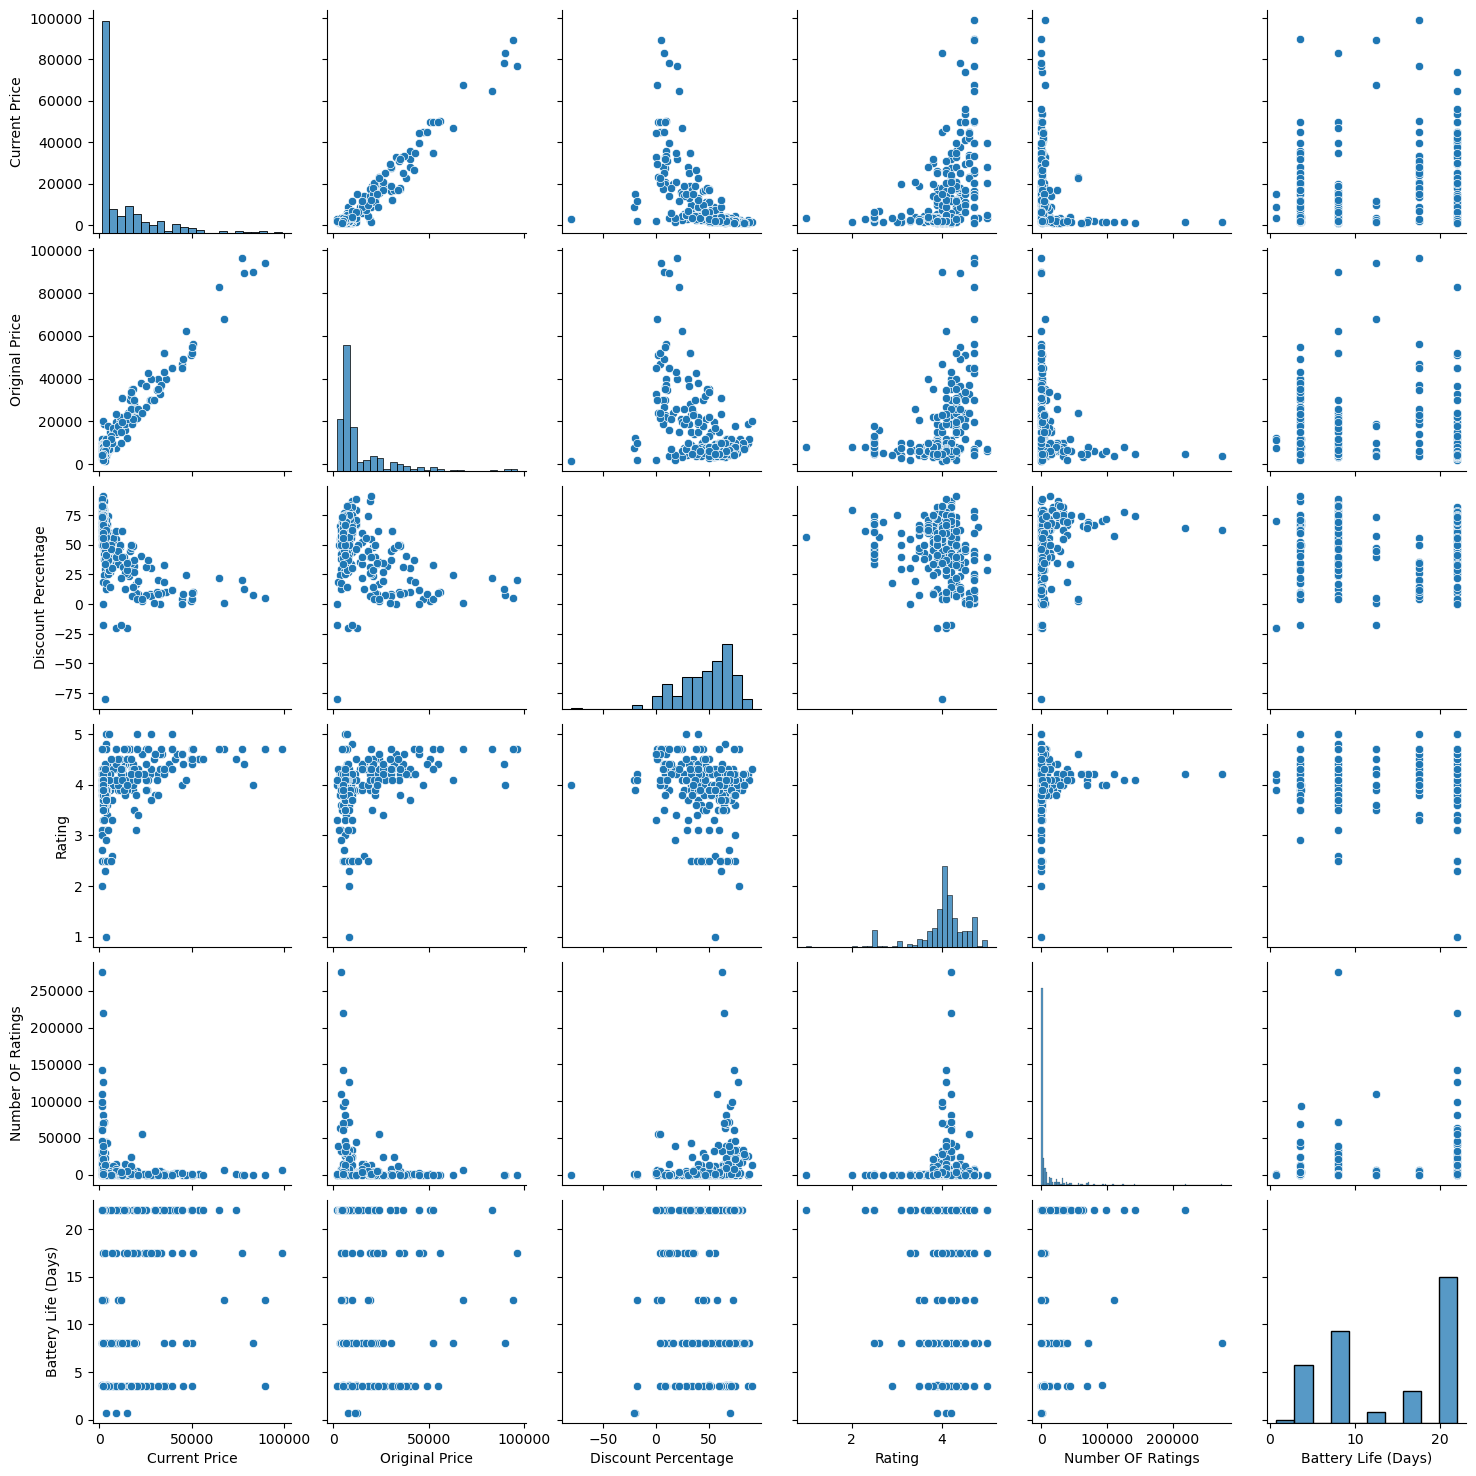

In [139]:
sns.pairplot(train_df[numerical_data])
